## Background and research motivation

The U.S. Small Business Administration(SBA), which came out of the response to the Great Depression and World War II has been helping small business establishments since 1953 in the U.S. The main function of SBA, as of the Small Business Act of 1953, was to "aid, counsel, assist and protect, insofar as is possible, the interests of small business concerns". SBA is assisting in the small business establishment by providing easier access to the capital market via loan guarantees, contracts, and counseling. The loan guarantee program has encouraged many banks to grant small business loans which have helped to access capital markets by millions of small business owners throughout the country.

As we are amid COVID-19, the main quest that remained in this unprecedented time is how to survive. The pandemic continues to take its toll on the nation's economy and the government's major effort has been concentrated on stymieing the spread of the virus. Another reality is that almost one-third of small businesses were not able to survive during the COVID-19 pandemic. 

Small businesses have been one of the leading sectors in job creation and sparking innovation. This sector generates about 50 percent of the gross domestic product(GDP). Being one of the prominent sectors for the country's economy, the government has taken steps to relieve the pain of pandemic loss among 31.7 million small businesses in the U.S. The Coronavirus Aid, Relief, and Economic Security (CARES) Act that was passed in March 2020 has aimed to help small businesses by providing loans to maintain the payroll. The CARES Act set aside $669 billion for the relief of small businesses to be administered by the SBA as PPP. After the implementation of PPP, there has been a huge upsurge in the loan application and initial funding arrangements have been exhausted and they came up with the second round of relief package. 

Considering the fact of the immense importance of SBA loans and the present pandemic, I was curious to see how the loan applicant has been ended up as a default? So, my primary goal in this study was to find the major factors that play an important role in making the loan default. This study will help in decision-making by the financial agencies on which applicants' loans should they approve?



## Importing libraries and dataframe



In [69]:
# Basic Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
# additional plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
# set display options
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows', 150)

# other
from collections import Counter
import missingno as msno # checking the null
import json # for usa map

In [70]:
#Model Evaluation:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, f1_score,auc,roc_curve,roc_auc_score, log_loss, make_scorer, precision_recall_curve
import scikitplot as skplt
from sklearn.datasets import make_classification
#Modeling Algoritms:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import svm
#Balancing the Dataset:
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

In [71]:
df = pd.read_csv("E:/Bootcamp/Thinkful/Thinkful Modules/23 Capstone Supervised Learning/Data/SBA_Loan/SBAnational.csv", low_memory=False)

## Dataframe overview and variable description


The dataset has been retrieved from kaggle. The dataset consists of historical loan data for SBA. The date range is from 1968 to 2014 with 899164 observations and 27 variables. The variables are described as follows:


 **Brief description of each variables**
 
| Variable name     | Data type | Description of variable                               |
|-------------------|-----------|-------------------------------------------------------|
| LoanNr_ChkDgt     | Text      | Identification Number for Each Loan Case              |
| Name              | Text      | Borrower Name                                         |
| City              | Text      | Borrower City                                         |
| State             | Text      | Borrower State                                        |
| Zip               | Text      | Borrower Zip Code                                     |
| Bank              | Text      | Bank Name                                             |
| BankState         | Text      | Bank State                                            |
| NAICS             | Text      | North American Industry Classification System Code    |
| ApprovalDate      | Date/Time | Date SBA Commitment Issued                            |
| ApprovalFY        | Text      | Fiscal Year of Commitment                             |
| Term              | Integer   | Loan Term in Months                                   |
| NoEmp             | Integer   | Number of Business' Employees                         |
| NewExist          | Text      | New or Existing Business (1 = existing,0 = new)       |
| CreateJob         | Integer   | Total Jobs Created by Business                        |
| RetainedJob       | Integer   | Number of Jobs Retained                               |
| FranchiseCode     | Text      | Franchise code, (00000 or 00001) = No Franchise       |
| UrbanRural        | Text      | Business Location(1 = Urban, 2 = Rural, 0 = Undefined)|
| RevLineCr         | Text      | Revolving line of credit: Y=Yes, N=No                 |
| LowDoc            | Text      | LowDoc Loan Program: Y=Yes, N=No(expidited processing)|
| ChgOffDate        | Date/Time | The date when a loan is declared to be in default     |
| DisbursementDate  | Date/Time | Loan Disbursement Date                                |
| DisbursementGross | Currency  | Gross loan amount disburse                            |
| BalanceGross      | Currency  | Gross Amount Outstanding                              |
| MIS_Status        | Text      | Loan status: charged off = CHGOFF, Paid in full = PIF |
| ChgOffPrinGr      | Currency  | Charged-off Amount                                    |
| GrAppv            | Currency  | Gross Amount of Loan Approved by Bank                 |
| SBA_Appv          | Currency  | Amount guaranteed by SBA                              |

In [72]:
# checking the dataframe
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [73]:
df.shape

(899164, 27)

In [74]:
# What are the null values in the data
df.isna().sum().sort_values(ascending = False)

# Outcome: ChgOffDate has extensive null values followed by RevLineCr and LowDoc

ChgOffDate           736465
RevLineCr              4528
LowDoc                 2582
DisbursementDate       2368
MIS_Status             1997
BankState              1566
Bank                   1559
NewExist                136
City                     30
State                    14
Name                     14
LoanNr_ChkDgt             0
GrAppv                    0
ChgOffPrinGr              0
BalanceGross              0
DisbursementGross         0
CreateJob                 0
UrbanRural                0
FranchiseCode             0
RetainedJob               0
NoEmp                     0
Term                      0
ApprovalFY                0
ApprovalDate              0
NAICS                     0
Zip                       0
SBA_Appv                  0
dtype: int64

In [75]:
# checking the descriptive statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.0,4.772612e+09,2.538175e+09,1.000014e+09,2.589758e+09,4.361439e+09,6.904627e+09,9.996003e+09
Zip,899164.0,5.380439e+04,3.118416e+04,0.000000e+00,2.758700e+04,5.541000e+04,8.370400e+04,9.999900e+04
NAICS,899164.0,3.986610e+05,2.633183e+05,0.000000e+00,2.352100e+05,4.453100e+05,5.617300e+05,9.281200e+05
Term,899164.0,1.107731e+02,7.885731e+01,0.000000e+00,6.000000e+01,8.400000e+01,1.200000e+02,5.690000e+02
NoEmp,899164.0,1.141135e+01,7.410820e+01,0.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,9.999000e+03
NewExist,899028.0,1.280404e+00,4.517500e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
CreateJob,899164.0,8.430376e+00,2.366882e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.800000e+03
RetainedJob,899164.0,1.079726e+01,2.371206e+02,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,9.500000e+03
FranchiseCode,899164.0,2.753726e+03,1.275802e+04,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999900e+04
UrbanRural,899164.0,7.577483e-01,6.464360e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [76]:
# Let's check the MIS_Status which is our dependent variable
Counter(df['MIS_Status'])

# It shows there are 1997 null values

Counter({'P I F': 739609, 'CHGOFF': 157558, nan: 1997})

NAICS: https://www.census.gov/naics/?58967?yearbck=2017

**Sector number & Definition**

11 Agriculture, Forestry, Fishing and Hunting

21 Mining, Quarrying, and Oil and Gas Extraction

22 Utilities

23 Construction

31-33 Manufacturing

42 Wholesale Trade

44-45 Retail Trade

48-49 Transportation and Warehousing

51 Information

52 Finance and Insurance

53 Real Estate and Rental and Leasing

54 Professional, Scientific, and Technical Services

55 Management of Companies and Enterprises

56 Administrative and Support and Waste Management and Remediation Services

61 Educational Services

62 Health Care and Social Assistance

71 Arts, Entertainment, and Recreation

72 Accommodation and Food Services

81 Other Services (except Public Administration)

92 Public Administration

<AxesSubplot:>

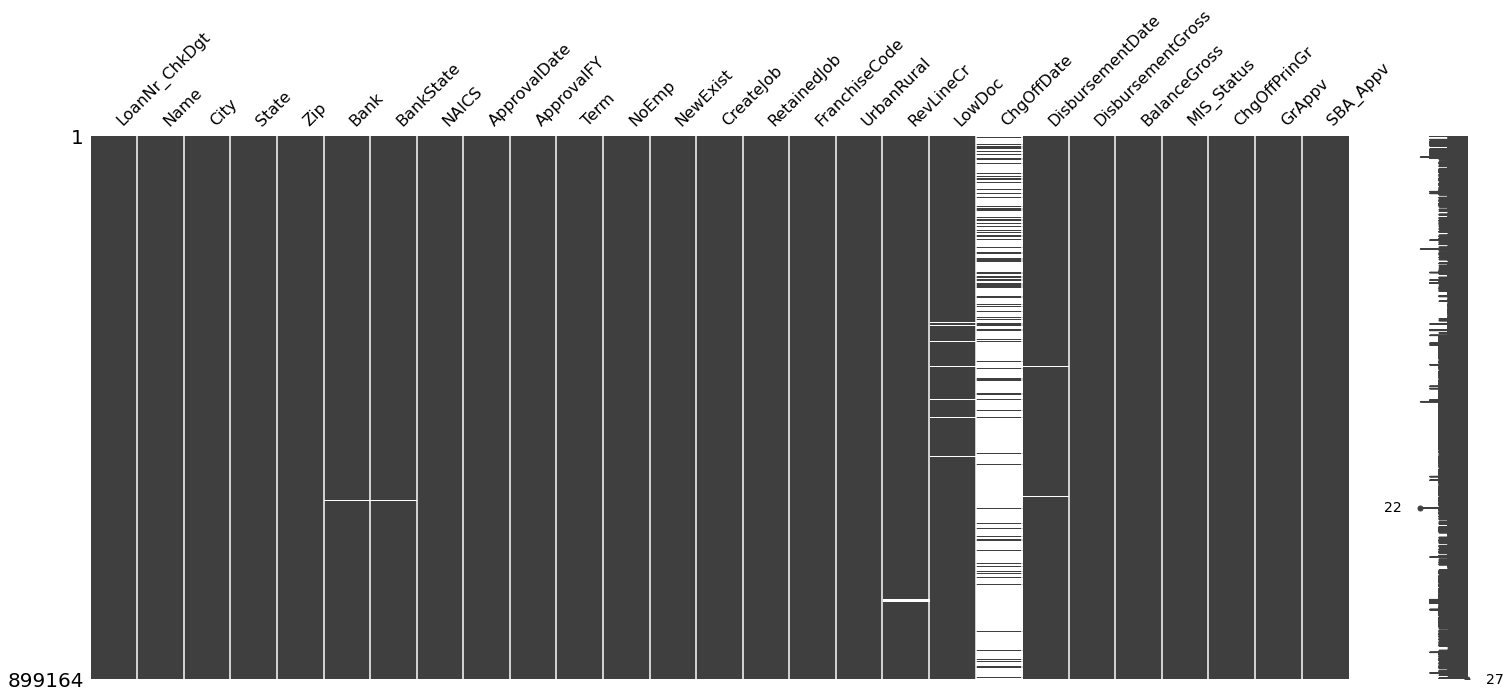

In [77]:
# Lets visualise the missing values in the df
msno.matrix(df)

#outcome: We can see that Bank, BankState, RevLineCr, ChgOffDate and DisbursementDate have missing values.

## Data cleaning and EDA

This section uses the data exploratory analysis to explore the variable of interest to explain the dependent or outcome variable. Here we will have some idea about which variables are good predictors of whether the loan will go into default?

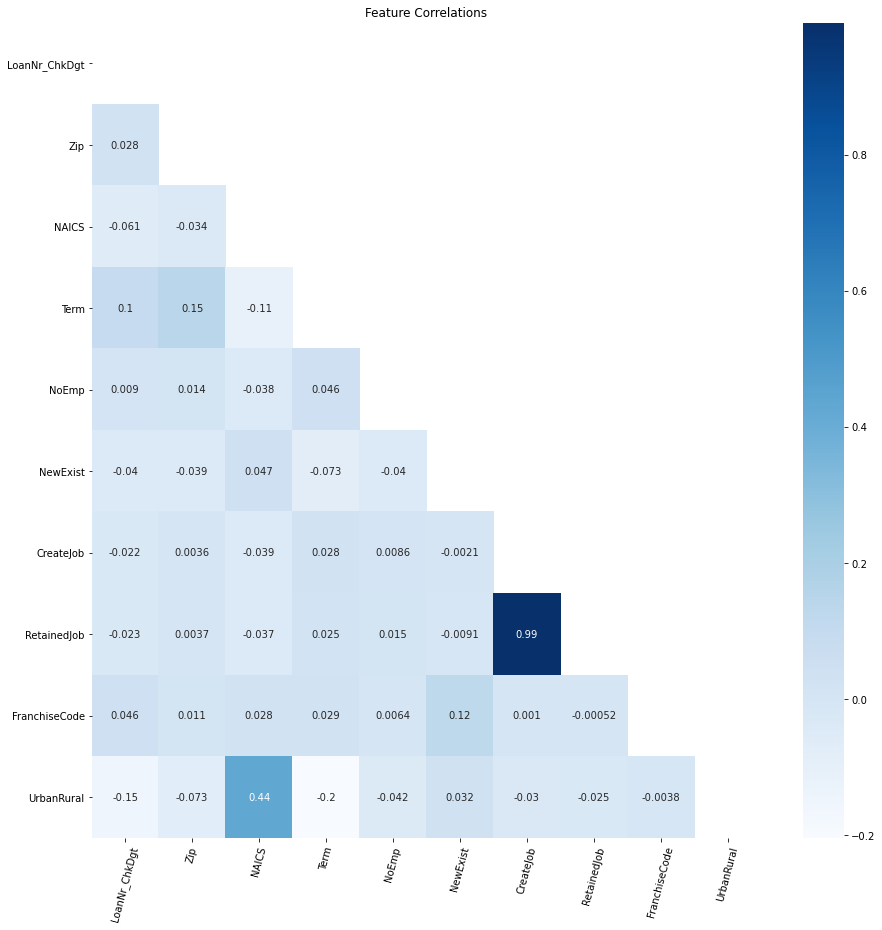

In [78]:
# correlation matrix of the features
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, ax=ax, mask=mask, cmap = "Blues").set(title='Feature Correlations')
plt.xticks(rotation=75)
plt.yticks(rotation=0)
plt.show()

# need to remove one of retainedjob or createjob

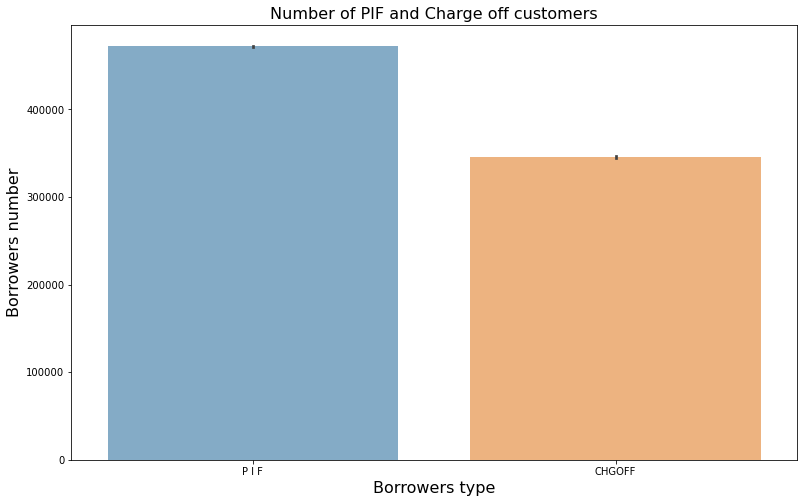

In [79]:
# checking the target variable
plt.figure(figsize=(13,8))
sns.barplot(y= df.State.index, x=df.MIS_Status.values, alpha=0.6)
plt.title("Number of PIF and Charge off customers", fontsize=16)
plt.xlabel("Borrowers type", fontsize=16)
plt.ylabel("Borrowers number", fontsize=16)
plt.show()
#PIF= paid in full, CHGOFF= Chargedoff

In [80]:
# pie chart of the MIS_Status
payer_type= df['MIS_Status'].value_counts()
labels = (np.array(payer_type.index))
values = (np.array((payer_type/ payer_type.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=True)

layout = go.Layout(
    title="Payers Type"
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="MIS_Status")


In [81]:
# copying the df to proceed further
df1 = df.copy()

In [82]:
# cleaning the dependent variable, removing null values as we have sufficient observation to work with.
df1.dropna(subset = ['MIS_Status'], inplace = True)

In [83]:
# what changes has been made so far

print(df1.shape)
print(df.shape)

(897167, 27)
(899164, 27)


In [84]:
# Extracting first two digits of the NCAICS

df1['sector'] = df1.NAICS.astype(str).str[:2].astype(int)

In [85]:
#Map NAICS codes to industries
ind_dict = {11: 'Agri, Forest, Fishing',
            21: 'Mining, Oil & Gas',
            22: 'Utilities',
            23: 'Construction',
            31: 'Manufacturing',
            32: 'Manufacturing',
            33: 'Manufacturing',
            42: 'Wholesale',
            44: 'Retail',
            45: 'Retail',
            48: 'Transportation',
            49: 'Transportation',
            51: 'Information',
            52: 'Finance & Insurance',
            53: 'Real Estate',
            54: 'Professional Services',
            55: 'Management',
            56: 'Administration and Support',
            61: 'Education',
            62: 'Health Care',
            71: 'Arts & Entertainment',
            72: 'Accommodation & Food Services',
            81: 'Other Services',
            92: 'Public Administration'}

df1['industry'] = df1['sector'].map(ind_dict)


In [86]:
# rename the column
df1 = df1.rename(columns={'LoanNr_ChkDgt':'LoanNo'})

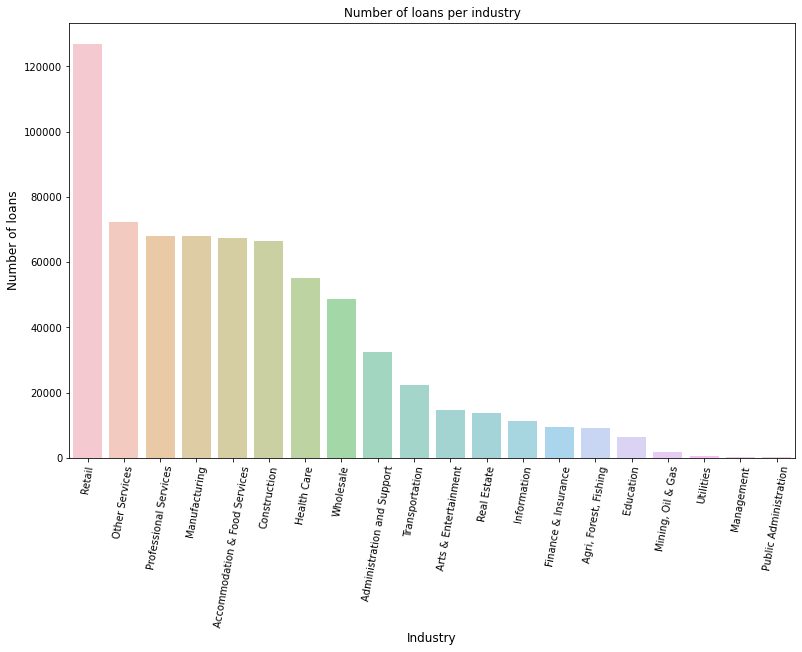

In [87]:
# Which sector is prominent reciepient
plt.figure(figsize=(13,8))
sectors = df1['industry'].value_counts()
sns.barplot (y=sectors.values, x=sectors.index, alpha=0.5)
plt.xlabel('Industry', fontsize=12)
plt.xticks(rotation=80)
plt.ylabel("Number of loans", fontsize=12)
plt.title("Number of loans per industry")
plt.show()


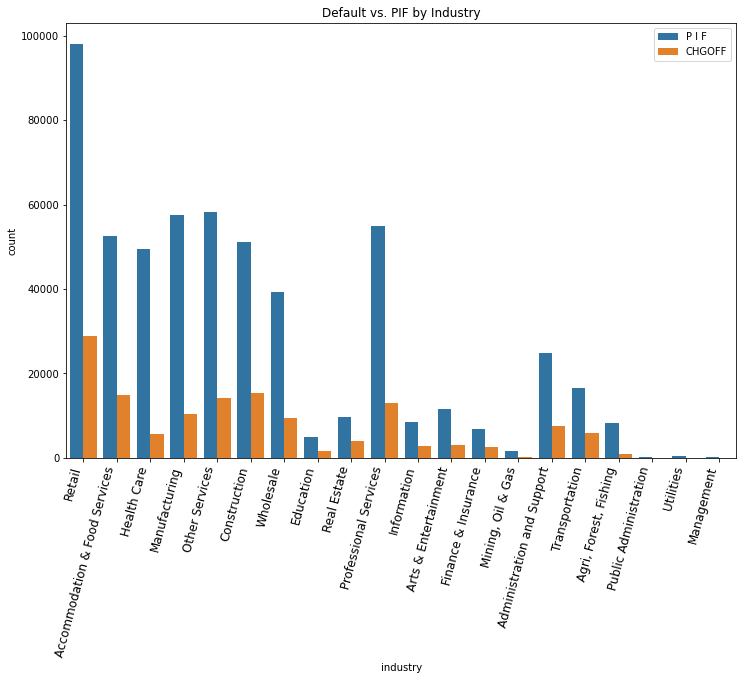

In [88]:
### loan default by sectors
plt.figure(figsize=(12,8))
sns.countplot(x="industry", hue="MIS_Status", data=df1)
plt.xticks(rotation=75,horizontalalignment='right', fontsize=12)
plt.title('Default vs. PIF by Industry')
plt.legend()
plt.show()

# Seems like retail industry is the prominent receipient and it also has prominent default activities among others.
# It is an important indicator to explain the probability of being default. I will check out this later
# to classify this as a separate variable.

In [89]:
# What is the default vs PIF in terms of loan Term
# Term is in monthly format, changing to yearly for simplicity
df1.Term = df1.Term//12

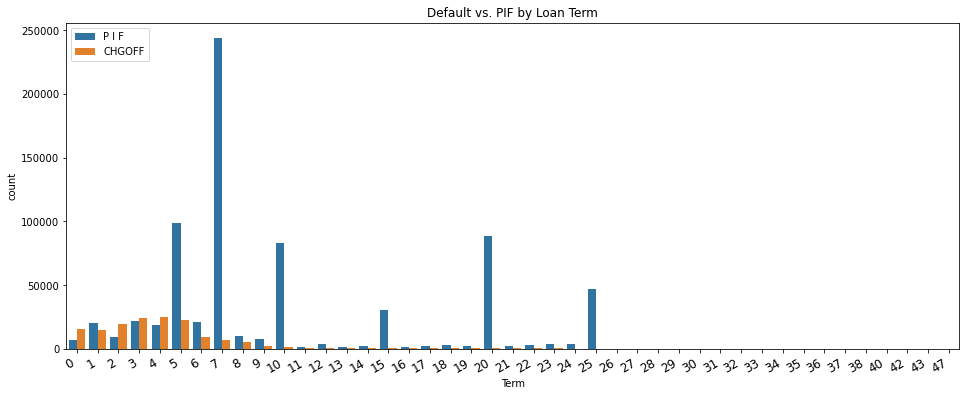

In [90]:
# Plotting Default vs PIF by Loan Term

plt.figure(figsize=(16, 6))
ax=sns.countplot(x='Term', hue='MIS_Status', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize=12)
plt.title('Default vs. PIF by Loan Term')
plt.legend()
plt.show()

# we can see that there are some spikes intervals. That might be because of customary loan term.
# Most loan term are 5, 7, 10, 15, 20, 25 years. 


In [91]:
# Lets change the format of MIS_Status to binary
Counter(df1.MIS_Status).keys()

dict_keys(['P I F', 'CHGOFF'])

In [92]:
df1['MIS_Status'].replace({'CHGOFF': 0, 'P I F':1}, inplace = True)

In [93]:
print(Counter(df1.MIS_Status).keys())
print(Counter(df1.MIS_Status).values())

dict_keys([1, 0])
dict_values([739609, 157558])


In [94]:
df1.columns

Index(['LoanNo', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'sector',
       'industry'],
      dtype='object')

In [95]:
# Changing the Currency to float
#Accessing col index
cols = ['ChgOffPrinGr', 'GrAppv', 'SBA_Appv','DisbursementGross',
       'BalanceGross']
[df1.columns.get_loc(i) for i in cols if i in df1]


[24, 25, 26, 21, 22]

In [96]:
# Removing the $ sign from the specific indexes
col_index = [24, 25, 26, 21, 22]

for i in col_index:
    df1[df1.columns[i]] = df1[df1.columns[i]].replace('[\$,]', '',regex = True).astype(float) 

In [97]:
df1.head(2)

,LoanNo,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,sector,industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,7,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,60000.0,0.0,1,0.0,60000.0,48000.0,45,Retail
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,5,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,40000.0,0.0,1,0.0,40000.0,32000.0,72,Accommodation & Food Services


In [98]:
# Change the date formate of ApprovalDate
df1['ApprovalDate'] = df1['ApprovalDate'].astype(str)
df1['ApprovalDate'] = pd.to_datetime(df1['ApprovalDate'])

In [99]:
print(Counter(df1.LowDoc).keys())
print(Counter(df1.LowDoc).values())
# seems like there are some errors

dict_keys(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'])
dict_values([110171, 780997, 758, 1, 2578, 603, 74, 495, 1490])


In [100]:
# Change LowDoc to boolean icluding some missclassified as 0 1
df1['LowDoc'] = df1['LowDoc'].map({0:0, 1:1, 'N':0, 'Y':1})

In [101]:
df1.LowDoc.nunique()

2

In [102]:
# Create new var with LowDoc = Yes condition for further exploration.

low_doc = df1[df1['LowDoc']==1]

In [103]:
low_doc['Term'].describe() 

# mean years is 7 years with LowDoc
# 75% is also 7 years 
# no uniqueness 

count    110171.000000
mean          7.210273
std           3.849432
min           0.000000
25%           5.000000
50%           7.000000
75%           7.000000
max          42.000000
Name: Term, dtype: float64

In [104]:
print(Counter(low_doc.MIS_Status).keys())
print(Counter(low_doc.MIS_Status).values())

dict_keys([1, 0])
dict_values([100267, 9904])


In [105]:
#Checking approveamount
df1.GrAppv.describe()

count    8.971670e+05
mean     1.930595e+05
std      2.834331e+05
min      1.000000e+03
25%      3.500000e+04
50%      9.000000e+04
75%      2.250000e+05
max      5.472000e+06
Name: GrAppv, dtype: float64

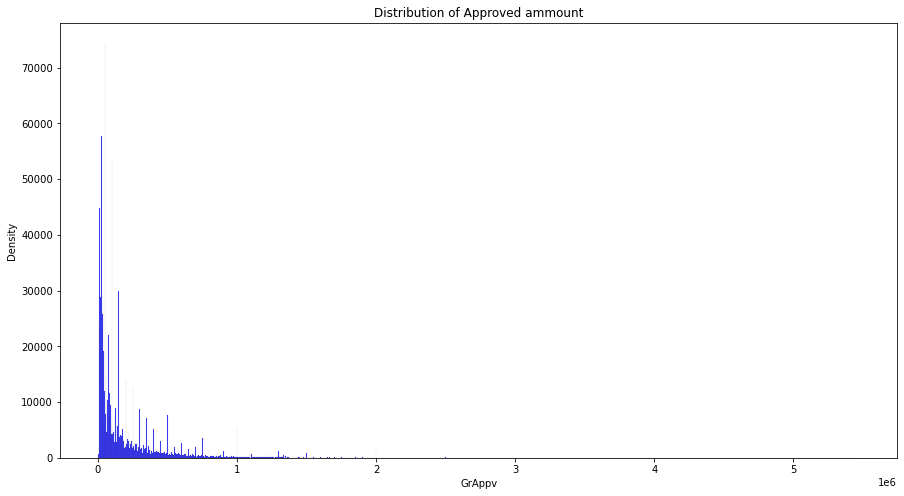

In [106]:
#Plot GrAppv (gross amount approved)
plt.figure(figsize=(15, 8))
sns.histplot(df1.GrAppv, color="b")
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

In [107]:
# Fixing the distribution of GrAppv

df1['GrAppv'] = np.log(df1['GrAppv'])

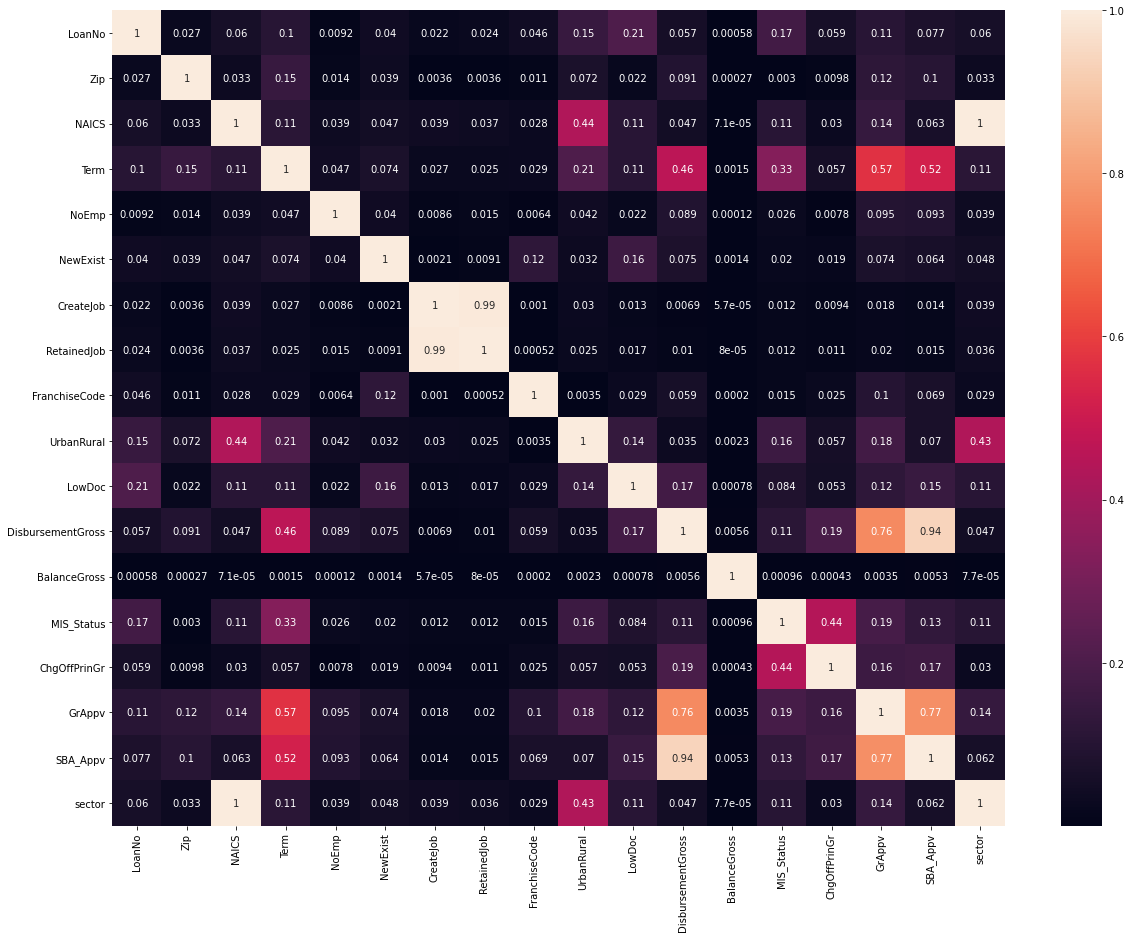

In [108]:
plt.subplots(figsize=(20, 15))
sns.heatmap(abs(df1.corr()), annot=True)
plt.show()

In [109]:
# Checking unique of 'UrbanRural'
print(df1['UrbanRural'].unique())


[0 1 2]


In [110]:
pd.crosstab(df1['UrbanRural'], df1['MIS_Status'])

MIS_Status,0,1
UrbanRural,,
0,22978,299848
1,114867,354414
2,19713,85347


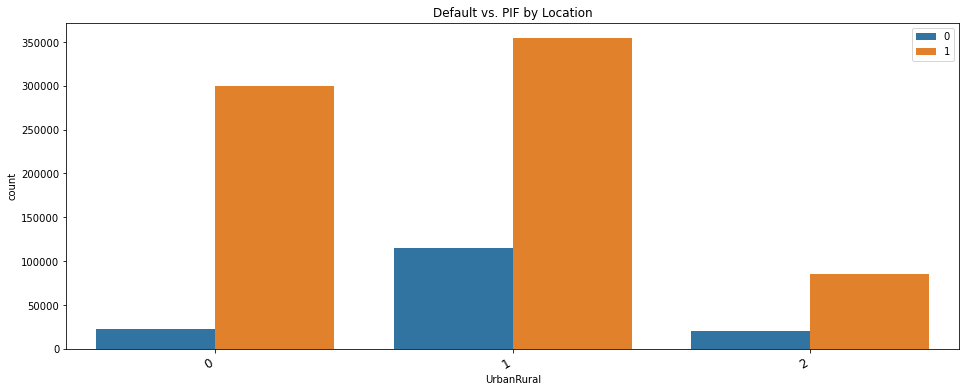

In [111]:
# Plot ruralurban vs MIS_Status
plt.figure(figsize=(16, 6))
ax=sns.countplot(x='UrbanRural', hue='MIS_Status', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize=12)
plt.title('Default vs. PIF by Location')
plt.legend()
plt.show()
# 1 = Urban, 2 = Rural, 0 = Undefined
# 1 = PIF, 0 = Default

In [112]:
# Checking features
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897167 entries, 0 to 899163
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNo             897167 non-null  int64         
 1   Name               897153 non-null  object        
 2   City               897137 non-null  object        
 3   State              897154 non-null  object        
 4   Zip                897167 non-null  int64         
 5   Bank               895661 non-null  object        
 6   BankState          895654 non-null  object        
 7   NAICS              897167 non-null  int64         
 8   ApprovalDate       897167 non-null  datetime64[ns]
 9   ApprovalFY         897167 non-null  object        
 10  Term               897167 non-null  int64         
 11  NoEmp              897167 non-null  int64         
 12  NewExist           897033 non-null  float64       
 13  CreateJob          897167 non-null  int64   

In [113]:
Counter(df1['RevLineCr'])

Counter({'N': 419252,
         '0': 257431,
         'Y': 200660,
         'T': 15239,
         nan: 4520,
         '`': 11,
         ',': 1,
         '1': 23,
         'C': 2,
         '3': 1,
         '2': 6,
         'R': 14,
         '7': 1,
         'A': 1,
         '5': 1,
         '.': 1,
         '4': 1,
         '-': 1,
         'Q': 1})

In [114]:
# Mapping the revolving line of credit. I have included 0 and 1 as N and Y
df1['RevLineCr'] = df1['RevLineCr'].map({'0':0, '1':1, 'N':0, 'Y':1})

In [115]:
print(df1.RevLineCr.value_counts())
print(df1.RevLineCr.isnull().sum())

0.0    676683
1.0    200683
Name: RevLineCr, dtype: int64
19801


In [116]:
print(df1.NewExist.unique())

[ 2.  1.  0. nan]


In [117]:
# Checking NewExists
# 0 exists which is not defined 
print(Counter(df1['NewExist']))

Counter({1.0: 643446, 2.0: 252559, 0.0: 1028, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, na

In [118]:
# Mapping NewExist

df1['NewExist'] = df1['NewExist'].map({1:1, 2:2})

In [119]:
print(df1.NewExist.unique())
print('\n')
print(df1.NewExist.value_counts())

[ 2.  1. nan]


1.0    643446
2.0    252559
Name: NewExist, dtype: int64


### Retained/ created job/ franchise code

In [120]:
df1.RetainedJob.value_counts()

0       439973
1        88264
2        76554
3        49796
4        39551
         ...  
198          1
1300         1
685          1
274          1
305          1
Name: RetainedJob, Length: 357, dtype: int64

In [121]:
df1.CreateJob.value_counts()

0       627614
1        63005
2        57753
3        28776
4        20493
         ...  
195          1
190          1
189          1
186          1
1530         1
Name: CreateJob, Length: 246, dtype: int64

In [122]:
df1.FranchiseCode.value_counts()

1        637395
0        208040
78760      3373
68020      1921
50564      1034
          ...  
45953         1
21605         1
14225         1
77746         1
25366         1
Name: FranchiseCode, Length: 2767, dtype: int64

After looking at the values, zero is the prominent value in all cases. I would like to take into account CreateJob and exclude Retain job as they are strongly correlated(from heatmap). Also, would be a better way to make dummy classifier in both CreateJob and FranchiseCode.


In [123]:
#Creating dummy classifier 

df1['FranchiseCode'] = np.where(df1['FranchiseCode'] > 1, 1, 0) # 0 or 1 NoFranchise or Franchise
df1['CreateJob'] = np.where(df1['CreateJob'] > 1, 1, 0) # 0 or 1  Not created a job or created a job

In [124]:
df1.head(40)

,LoanNo,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,sector,industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,7,4,2.0,0,0,0,0,0.0,1.0,NaN,28-Feb-99,60000.0,0.0,1,0.0,11.002100,48000.0,45,Retail
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,5,2,2.0,0,0,0,0,0.0,1.0,NaN,31-May-97,40000.0,0.0,1,0.0,10.596635,32000.0,72,Accommodation & Food Services
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,15,7,1.0,0,0,0,0,0.0,0.0,NaN,31-Dec-97,287000.0,0.0,1,0.0,12.567237,215250.0,62,Health Care
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,5,2,1.0,0,0,0,0,0.0,1.0,NaN,30-Jun-97,35000.0,0.0,1,0.0,10.463103,28000.0,0,NaN
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,20,14,1.0,1,7,0,0,0.0,0.0,NaN,14-May-97,229000.0,0.0,1,0.0,12.341477,229000.0,0,NaN
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,1997-02-28,1997,10,19,1.0,0,0,0,0,0.0,0.0,NaN,30-Jun-97,517000.0,0.0,1,0.0,13.155798,387750.0,33,Manufacturing
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,1980-06-02,1980,3,45,2.0,0,0,0,0,0.0,0.0,24-Jun-91,22-Jul-80,600000.0,0.0,0,208959.0,13.304685,499998.0,0,NaN
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,1997-02-28,1997,7,1,2.0,0,0,0,0,0.0,1.0,NaN,30-Jun-98,45000.0,0.0,1,0.0,10.714418,36000.0,81,Other Services
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,1997-02-28,1997,24,2,2.0,0,0,0,0,0.0,0.0,NaN,31-Jul-97,305000.0,0.0,1,0.0,12.628067,228750.0,72,Accommodation & Food Services
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,1997-02-28,1997,7,3,2.0,0,0,0,0,0.0,1.0,NaN,30-Apr-97,70000.0,0.0,1,0.0,11.156251,56000.0,0,NaN


### States and MIS_Status

In [125]:
# Import data
default_rate = pd.read_csv('https://raw.githubusercontent.com/sunil-20/sba_map/main/Default_Rate_US.csv')

In [126]:
default_rate.head()

,State,Defaulters
0,AK,11.693716
1,AL,16.614833
2,AR,16.800884
3,AZ,20.750113
4,CA,18.515113


In [127]:
default_rate

,State,Defaulters
0,AK,11.693716
1,AL,16.614833
2,AR,16.800884
3,AZ,20.750113
4,CA,18.515113
5,CO,17.822119
6,CT,14.043044
7,DC,23.992560
8,DE,17.966256
9,FL,27.369392


In [128]:
default_rate['ln_default'] = np.log10(default_rate['Defaulters'])

In [129]:
#Load the json file of USA
us_states = json.load(open('states.geojson','r'))

In [130]:
# Maping the data
state_id_map = {}
for feature in us_states['features']:
    feature['STUSPS']=feature['properties']['STUSPS']
    state_id_map[feature["properties"]["NAME"]] = feature["STUSPS"]

In [131]:

fig = px.choropleth(default_rate, locations='State',geojson = us_states,locationmode='USA-states', color = 'Defaulters', scope= 'usa')
fig.update_geos(fitbounds = 'locations',visible = False)

fig.update_layout(title_text = 'Defaulters by state')
fig.update_layout(title={'x':0.4,'xanchor':'center'})
fig.show()

From EDA it is clear that there is variance among states as well as industry to be default. So, considering their importance in predicting default, the better approach is to make a new  class of variable to make the context more understandable. 

In [133]:
# Change the States code to three levels considering their high, med or low risk of being default

df1['State_default'] = df1['State'].map({'FL':2, 'GA':2, 'DC':2, 'NV':2, 'IL':2, 'MI':2, 'TN':2, 'AZ':2, 'NJ':2,
                                'SC':2,'NY':2, 'MD':2, 'KY':2, 'NC':2, 'TX':2, 'VA':2, 'CA':2, 'LA':2,
                                'DE':1, 'CO':1, 'UT':1, 'IN':1, 'AR':1, 'AL':1, 'OH':1, 'WV':1, 'MS':1, 
                                'OK':1, 'OR':1, 'HI':1, 'MO':1, 'PA':1, 'ID':1, 'CT':1, 'WA':1, 'MA':1, 'KS':1, 
                                'WI':1, 'MN':1, 'IA':1, 'RI':1, 'AK':1, 'NE':1, 'NM':1, 'NH':1, 
                                'ME':0, 'SD':0, 'ND':0, 'VT':0, 'WY':0,'MT':0})
#high = 18
#mid = 27
#low = 6

In [134]:
df1.State_default.value_counts()

2.0    496140
1.0    368404
0.0     32610
Name: State_default, dtype: int64

In [135]:
#Let's see about the sector
pd.DataFrame((1- df1.groupby('State').mean()['MIS_Status'])*100)

,MIS_Status
State,
AK,11.693716
AL,16.614833
AR,16.800884
AZ,20.750113
CA,18.515113
CO,17.822119
CT,14.043044
DC,23.992560
DE,17.966256


In [136]:
sector_rate = pd.DataFrame((1-df1.groupby('sector').mean()['MIS_Status'])*100)

In [137]:
sector_rate.sort_values(by=['MIS_Status'], ascending= False)

,MIS_Status
sector,
53,28.731233
52,28.426610
48,26.888801
51,24.828375
61,24.246212
56,23.551293
45,23.415393
23,23.255429
49,22.986425


In [139]:
# Classifying the industry according to the probability of being default
df1['Industry_default'] = df1['sector'].map({53:2, 52:2, 48:2, 51:2, 61:2, 56:2, 45:2, 23:2, 49:2, 44:2, 
                                    72:2, 71:2, 81:1, 42:1, 31:1, 54:1, 32:1, 92:1, 22:1, 33:1,
                                    62:1, 55:1, 11:0, 21:0, 0:0})

In [140]:
# Adding GDP as one of the prominent variable to predict default rate
# The idea behind adding GDP is that, if economic activity is high, the businesses are running well
# which helps to reduce the business being default and vice versa.
df_gdp = pd.read_csv('E:/Bootcamp/Thinkful/Thinkful Modules/23 Capstone Supervised Learning/Data/US_GDP.csv')

In [141]:
df_gdp.head()

,ApprovalFY,GDP
0,1962,603.9
1,1963,637.5
2,1964,684.5
3,1965,742.3
4,1966,813.4


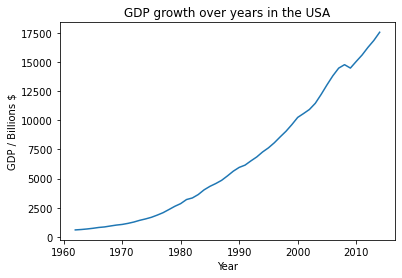

In [142]:
plt.plot(df_gdp.ApprovalFY, df_gdp.GDP)
plt.xlabel('Year')
plt.ylabel('GDP / Billions $')
plt.title('GDP growth over years in the USA')
plt.show()

In [143]:
df1['ApprovalFY'].describe()

count     897167
unique        49
top         2005
freq       76958
Name: ApprovalFY, dtype: object

In [144]:
print(df1['ApprovalFY'].unique())
#There is A in the data. 

['1997' '1980' '2006' '1998' '1999' '2000' '2001' '1972' '2003' '2004'
 '1978' '1979' '1981' '2005' '1982' '1966' '1983' '1973' '1984' '2007'
 '1985' '1986' '1987' '2008' '1988' '2009' '1989' '1991' '1990' '1974'
 '2010' '2011' '1992' '1993' '2002' '2012' '2013' '1994' '2014' '1975'
 '1977' '1976' '1968' '1976A' '1969' '1995' '1970' '1996' '1971']


In [145]:
# Convert ApprovalFY mis-spelt values 1976A to 1976
df1.loc[df1['ApprovalFY']=='1976A','ApprovalFY']='1976'  
df1['ApprovalFY'] = df1['ApprovalFY'].astype(int)

In [146]:
df1['ApprovalFY'].describe()

count    897167.000000
mean       2001.139677
std           5.912461
min        1966.000000
25%        1997.000000
50%        2002.000000
75%        2006.000000
max        2014.000000
Name: ApprovalFY, dtype: float64

In [147]:
# Merge GDP to current dataframe
df_merge = df1.merge(df_gdp, how='left', on='ApprovalFY')


In [148]:
df_merge.head(2)

,LoanNo,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,sector,industry,State_default,Industry_default,GDP
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,7,4,2.0,0,0,0,0,0.0,1.0,NaN,28-Feb-99,60000.0,0.0,1,0.0,11.002100,48000.0,45,Retail,1.0,2,8577.6
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,5,2,2.0,0,0,0,0,0.0,1.0,NaN,31-May-97,40000.0,0.0,1,0.0,10.596635,32000.0,72,Accommodation & Food Services,1.0,2,8577.6


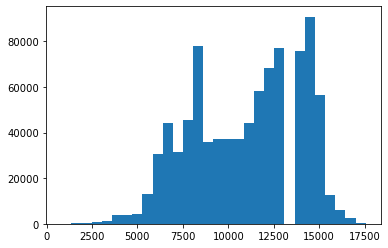

In [149]:
fig = plt.hist(df_merge['GDP'], bins= 30)
plt.show()

In [150]:
# Transform the variable

df_merge['GDP']=np.log(df_merge['GDP'])


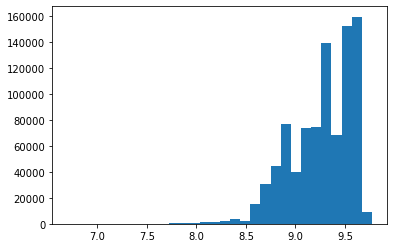

In [151]:
fig = plt.hist(df_merge['GDP'], bins= 30)
plt.show()

### Time frame

Considering the maturity of loan(customary practice 5 years or more), if we allow the years after 2010, that will provide more weight to the charge off comparing to the PIF because:

Charge off - prior to maturity date

PIF - at the maturity date of the loan

So, to minimise the bias, loan after 2010 has been excluded from the analysis to power the predictive model.

In [152]:
df_mrg = df_merge[df_merge['ApprovalFY']<=2010]

In [153]:
df_mrg['ApprovalFY'].value_counts()

2005    76958
2006    75756
2007    71649
2004    68195
2003    58000
1995    45688
2002    44307
1996    40021
2008    39458
1997    37718
2000    37352
1999    37348
2001    37317
1998    36005
1994    31584
1993    23299
1992    20875
2009    19103
2010    16828
1991    15660
1990    14859
1989    13245
1987     2218
1986     2118
1984     2019
1985     1941
1988     1898
1983     1682
1982      719
1981      602
1980      453
1979      349
1978      239
1977      137
1976       83
1973       49
1974       42
1975       29
1972       25
1971       18
1970        8
1969        3
1968        1
1966        1
Name: ApprovalFY, dtype: int64

In [154]:
# I would like to remove the years 1970,1969,1968,1966 as the number of observation is not sufficiently good.
df_mrg = df_merge[df_merge['ApprovalFY']>=1971]

In [155]:
df_mrg.shape

(897154, 32)

<AxesSubplot:>

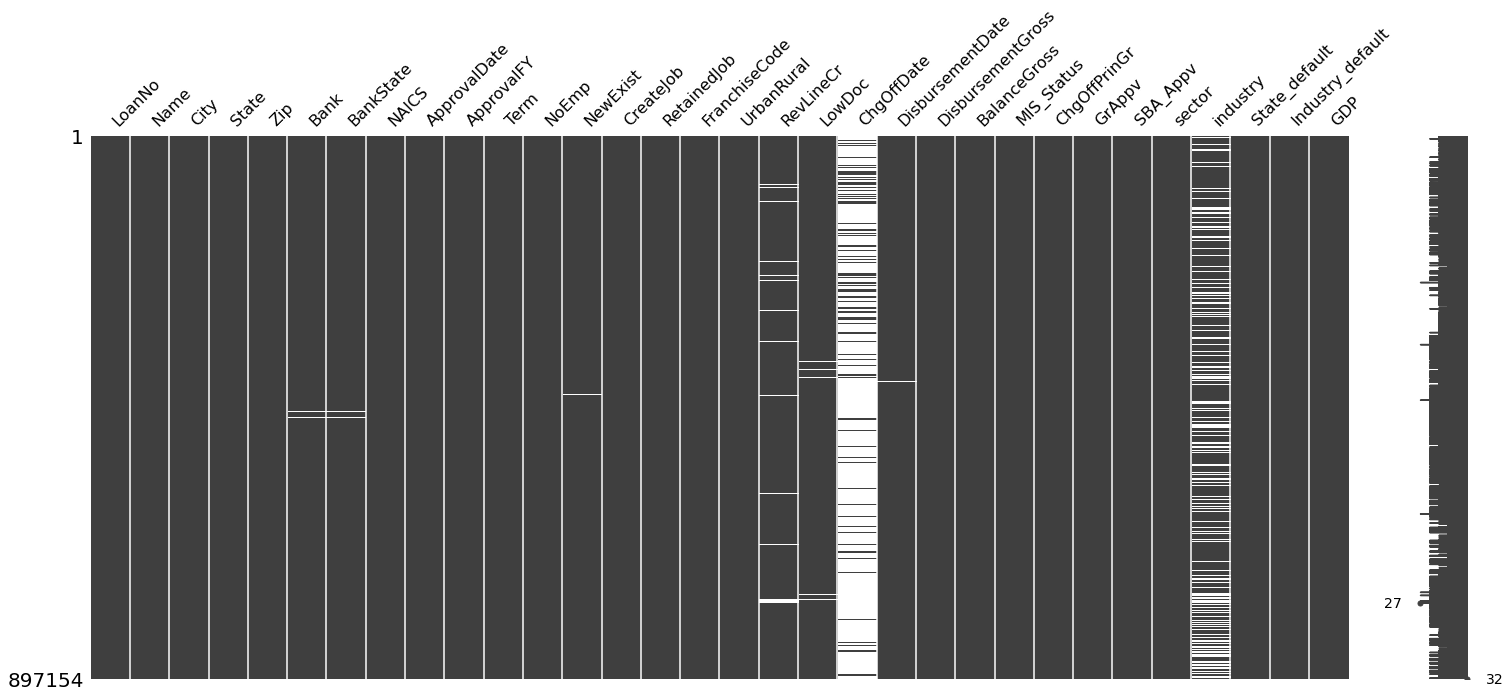

In [156]:
# Lets visualise the missing values in the df again
msno.matrix(df_mrg)

In [157]:
# Drop the variable that are not relevant for further analysis

df_mrg = df_mrg.drop(axis =1, columns = ['LoanNo','Name', 'City','Zip','Bank', 'BankState','NAICS','ApprovalDate','ChgOffDate','DisbursementDate','DisbursementGross','BalanceGross', 'ChgOffPrinGr'])


In [158]:
df_mrg.shape

(897154, 19)

In [159]:
df_mrg.head(2)

,State,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,sector,industry,State_default,Industry_default,GDP
0,IN,1997,7,4,2.0,0,0,0,0,0.0,1.0,1,11.002100,48000.0,45,Retail,1.0,2,9.056909
1,IN,1997,5,2,2.0,0,0,0,0,0.0,1.0,1,10.596635,32000.0,72,Accommodation & Food Services,1.0,2,9.056909


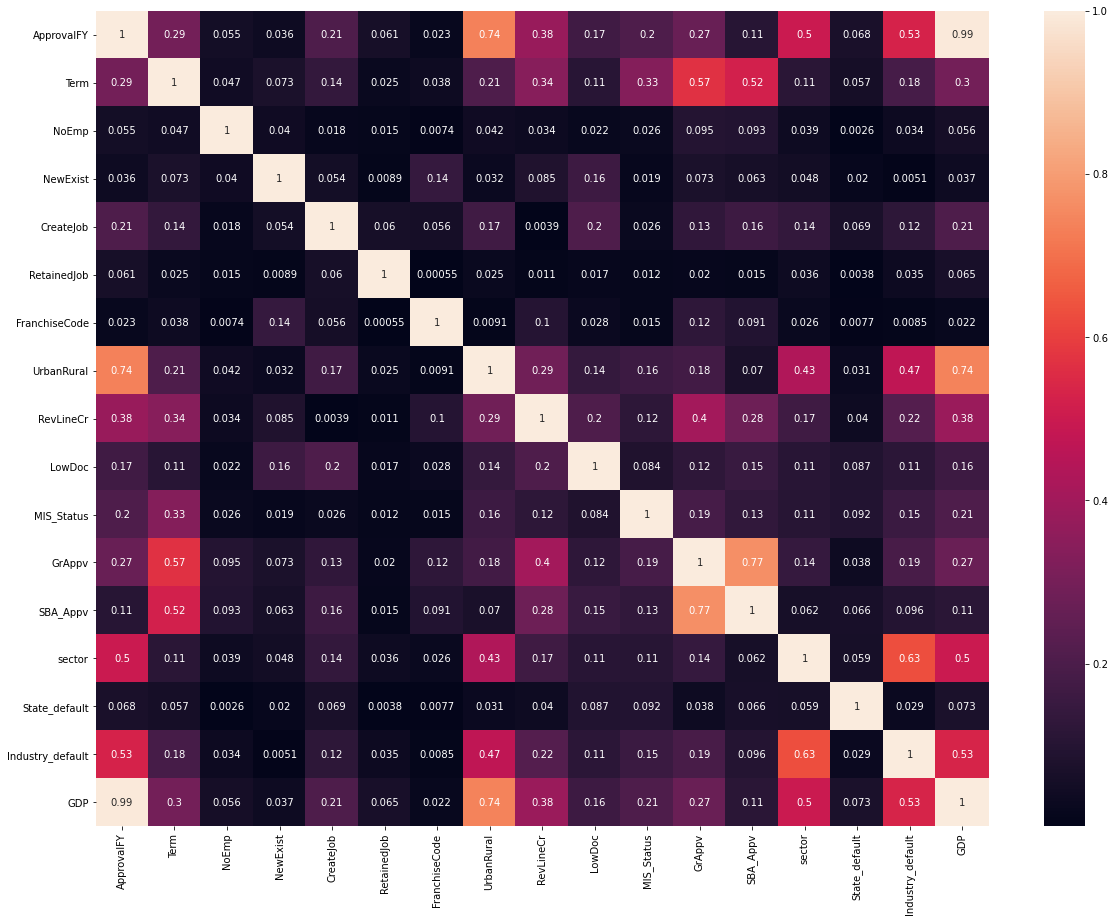

In [160]:
plt.subplots(figsize=(20, 15))
sns.heatmap(abs(df_mrg.corr()), annot=True)
plt.show()

In [161]:
# df drop industry
df_mrg = df_mrg.drop(axis =1, columns = ['industry'])

<AxesSubplot:>

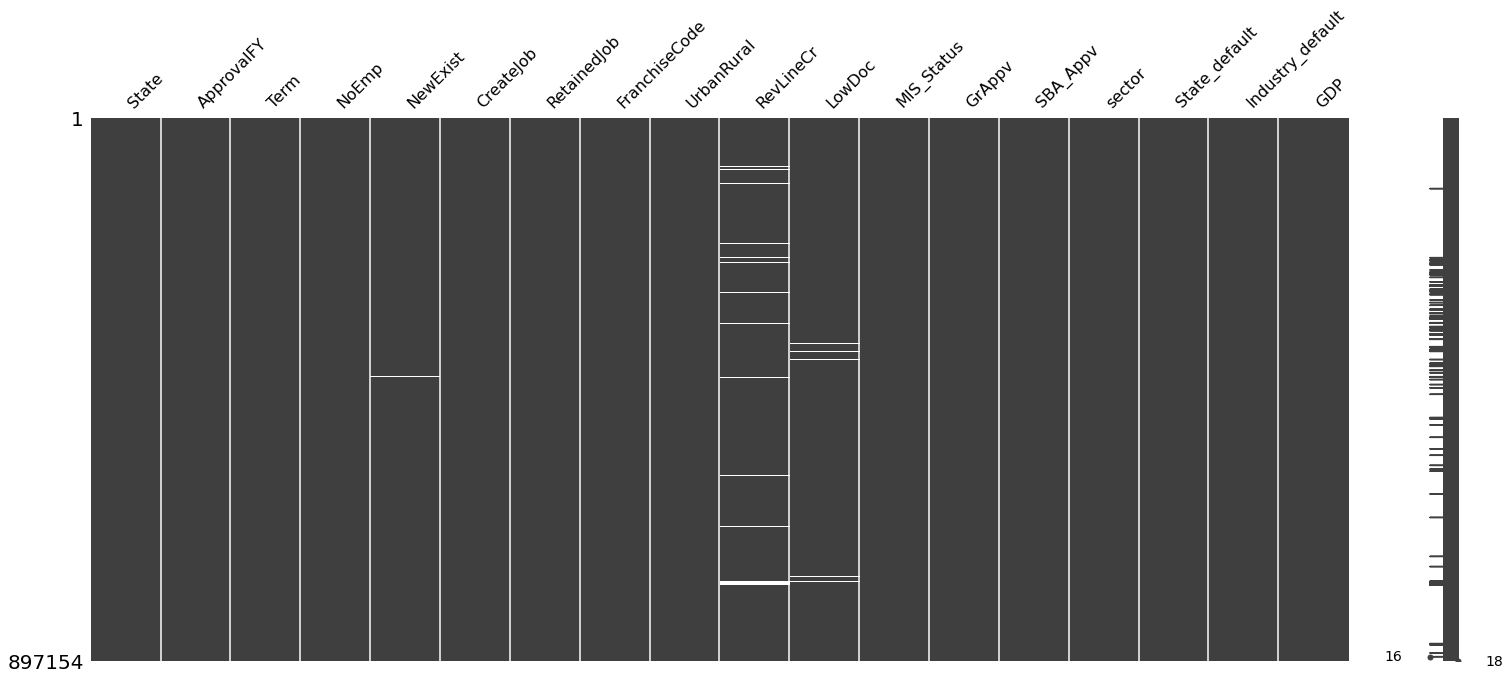

In [162]:
# Lets visualise the missing values in the df again
msno.matrix(df_mrg)

In [163]:
df_mrg.isna().sum().sort_values(ascending = False)

RevLineCr           19801
LowDoc               5999
NewExist             1158
State_default          12
State                  12
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
ApprovalFY              0
NoEmp                   0
MIS_Status              0
GrAppv                  0
SBA_Appv                0
sector                  0
Term                    0
Industry_default        0
GDP                     0
dtype: int64

In [164]:
# checking the RevLineCr
# create condition
cond_rev = df_mrg[(df_mrg['RevLineCr'] != 1) & (df_mrg['RevLineCr'] != 0)]
Counter(cond_rev.MIS_Status).values()

dict_values([13128, 6673])

In [165]:
# checking for further pattern with RevLineCr
RevLine_yes = df_mrg[df_mrg['RevLineCr'] == 1]
RevLine_no = df_mrg[df_mrg['RevLineCr'] == 0]

In [166]:
RevLine_no.NoEmp.describe()

count    676670.000000
mean         12.856150
std          81.965084
min           0.000000
25%           2.000000
50%           5.000000
75%          12.000000
max        9999.000000
Name: NoEmp, dtype: float64

In [167]:
RevLine_yes.NoEmp.describe()

count    200683.000000
mean          6.855414
std          39.998460
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max        8000.000000
Name: NoEmp, dtype: float64

In [168]:
# df drop RevLineCr
# there is no clear pattern of RevLineCr and many null

df_mrg = df_mrg.drop(axis =1, columns = ['RevLineCr'])

In [169]:
#LowDoc

cond_low = df_mrg[(df_mrg['LowDoc'] != 1) & (df_mrg['LowDoc'] != 0)]
cond_low


,State,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv,SBA_Appv,sector,State_default,Industry_default,GDP
7396,WI,2006,20,130,1.0,0,130,0,2,NaN,1,14.082480,1306000.0,33,1.0,1,9.533554
23325,NM,2006,10,7,2.0,0,0,0,1,NaN,1,11.982929,120000.0,72,1.0,2,9.533554
30636,TX,2006,10,5,2.0,0,0,1,1,NaN,1,12.149502,141750.0,72,2.0,2,9.533554
35432,OH,2006,21,2,2.0,0,0,0,1,NaN,1,13.997832,900000.0,81,1.0,1,9.533554
36058,VA,2005,6,1,1.0,1,1,0,2,NaN,1,12.429216,125000.0,48,2.0,2,9.475715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884350,TX,2006,5,16,1.0,0,0,0,1,NaN,1,12.206073,150000.0,54,2.0,1,9.533554
884377,TX,2006,7,71,1.0,0,0,0,1,NaN,1,14.508658,1500000.0,32,2.0,1,9.533554
885824,TX,2006,20,15,1.0,1,0,0,1,NaN,1,11.782953,131000.0,23,2.0,2,9.533554
889838,TX,2006,7,3,2.0,0,0,0,1,NaN,1,11.813030,114750.0,62,2.0,1,9.533554


In [170]:
# check MIS_Status vs LowDoc Condition
Counter(cond_low.MIS_Status).values()
#PIF = 4422
#Default = 1577


dict_values([4422, 1577])

In [171]:
#Is there any pattern with regards to LowDoc and non-LowDoc loans

low_doc = df_mrg[df_mrg['LowDoc'] == 1]


In [172]:
# what is term's relation with LowDoc
low_doc['Term'].describe()
#75% have 7 years of term

count    110171.000000
mean          7.210273
std           3.849432
min           0.000000
25%           5.000000
50%           7.000000
75%           7.000000
max          42.000000
Name: Term, dtype: float64

In [173]:
# what about Gross approved amount and LowDoc

low_doc['SBA_Appv'].describe()

# 75% have $80000  approved

count     110171.000000
mean       57127.306514
std        31261.343809
min         1600.000000
25%        32000.000000
50%        51521.000000
75%        80000.000000
max      1000000.000000
Name: SBA_Appv, dtype: float64

In [174]:
# I didn't see any optimal way to impute the column values. So, dropping the null values
df_mrg.dropna(subset=['LowDoc'], inplace= True)

In [175]:
df_mrg.isna().sum().sort_values(ascending = False)

NewExist            1149
State                 12
State_default         12
LowDoc                 0
Industry_default       0
sector                 0
SBA_Appv               0
GrAppv                 0
MIS_Status             0
UrbanRural             0
ApprovalFY             0
FranchiseCode          0
RetainedJob            0
CreateJob              0
NoEmp                  0
Term                   0
GDP                    0
dtype: int64

In [176]:
# lets drop the null values from NewExist
df_mrg.dropna(subset=['NewExist'], inplace= True)

In [177]:
# still 12 null in State_default
df_mrg.dropna(subset=['State_default'], inplace= True)

In [178]:
df_mrg.isna().sum().sort_values(ascending = False)

State               0
LowDoc              0
Industry_default    0
State_default       0
sector              0
SBA_Appv            0
GrAppv              0
MIS_Status          0
UrbanRural          0
ApprovalFY          0
FranchiseCode       0
RetainedJob         0
CreateJob           0
NewExist            0
NoEmp               0
Term                0
GDP                 0
dtype: int64

In [179]:
df_mrg.shape

(889994, 17)

## Splitting the data

In [180]:
df_mrg.columns

Index(['State', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'LowDoc', 'MIS_Status',
       'GrAppv', 'SBA_Appv', 'sector', 'State_default', 'Industry_default',
       'GDP'],
      dtype='object')

In [181]:
# X and y variables
X = df_mrg[['Term', 'NoEmp', 'NewExist','CreateJob','RetainedJob', 'FranchiseCode', 'UrbanRural', 'LowDoc',
       'GrAppv','SBA_Appv', 'State_default', 'Industry_default', 'GDP']]
y = df_mrg['MIS_Status']

In [182]:
#split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

In [185]:
print(X_train.shape)
print(y_test.shape)

(667495, 13)
(222499,)


### Training the data

#### Training with logistic model

Mean F1 score: 0.915
 Train Accuracy 0.8510985101011993 
 Test Accuracy: 0.8519588852084728 
 ROC_AUC_Score: 0.8477392318064804 
 Execution time: 0.3595888614654541
              precision    recall  f1-score   support

           0       0.68      0.29      0.41     38926
           1       0.87      0.97      0.92    183573

    accuracy                           0.85    222499
   macro avg       0.77      0.63      0.66    222499
weighted avg       0.83      0.85      0.83    222499



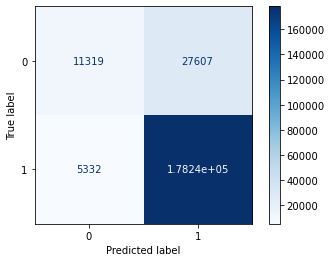

In [186]:
# logistic regression without balancing the data
def results(model):
    """ This will return a classification report, a confusion matrix and runtime."""
    time_start = time.time()
    y_test_pred = model.predict(X_test)
    print(' Train Accuracy', model.score(X_train, y_train),
          '\n Test Accuracy:', model.score(X_test, y_test),
          '\n ROC_AUC_Score:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
          '\n Execution time: {}'.format(time.time() - time_start))
    print(classification_report(y_test, y_test_pred))
    plot_confusion_matrix(model, X_test, y_test, values_format='.5g', cmap='Blues')
    plt.show()
    

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(max_iter=1000))
])
pipe.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=44)
scores = cross_val_score(pipe, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

print('Mean F1 score: %.3f' %(scores.mean()))
results(pipe)

#### Cost sensitive Logistic

Mean F1 score: 0.813
 Train Accuracy 0.7305702664439434 
 Test Accuracy: 0.7303538442869406 
 ROC_AUC_Score: 0.8437577892228767 
 Execution time: 0.31333398818969727
              precision    recall  f1-score   support

           0       0.38      0.83      0.52     38926
           1       0.95      0.71      0.81    183573

    accuracy                           0.73    222499
   macro avg       0.66      0.77      0.67    222499
weighted avg       0.85      0.73      0.76    222499



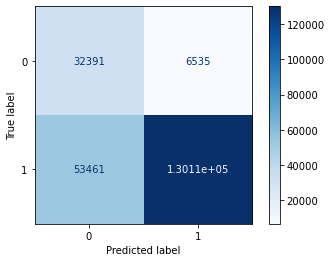

In [187]:
#Cost-Sensitive Logistic Regression for imbalanced classes

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipe.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=44)
scores = cross_val_score(pipe, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

print('Mean F1 score: %.3f' %(scores.mean()))
results(pipe)

### Which variable is important

I have chosen variables according to domain knowledge and looking at the correlation matrix. Now lets see which variable are important using the RandomForestClassifier.


####  Random Forest Classifier

In [188]:
clf = RandomForestClassifier(max_depth= 10, random_state=44)
clf.fit(X,y)

feat_imp = pd.Series(clf.feature_importances_, index = X.columns)
features = feat_imp.nlargest(10)
print(features)

Term                0.599100
GDP                 0.181652
SBA_Appv            0.054507
GrAppv              0.038574
UrbanRural          0.034641
RetainedJob         0.025836
State_default       0.023448
NoEmp               0.012064
Industry_default    0.011656
NewExist            0.007341
dtype: float64


<AxesSubplot:>

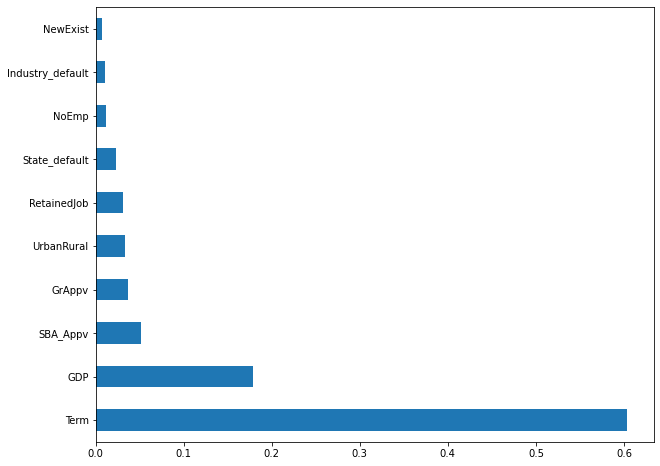

In [78]:
#print the important features as bar plot
fig = plt.figure(figsize = (10,8))
features.plot(kind='barh')

So, from the above figure we can confirm that Term , GDP and SBA_Appv are three major contributors for explain the target variable.

In [189]:
#New reduced features. I have excluded the variables which explains <= 1% to our target.

X = df_mrg[['Term', 'GrAppv', 'UrbanRural','SBA_Appv', 'State_default', 'RetainedJob', 'GDP']]
y = df_mrg['MIS_Status']
#split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

In [193]:
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(667495, 7)
(222499,)
(222499, 7)


#### Logistic regression with reduced features

Mean F1 score: 0.788
Train Accuracy: 0.7017865302361815 
Test Accuracy: 0.7010638250059551 
ROC_AUC_Score: 0.8412900066373015 
Execution time: 0.22740912437438965
              precision    recall  f1-score   support

           0       0.35      0.83      0.49     38926
           1       0.95      0.67      0.79    183573

    accuracy                           0.70    222499
   macro avg       0.65      0.75      0.64    222499
weighted avg       0.85      0.70      0.74    222499



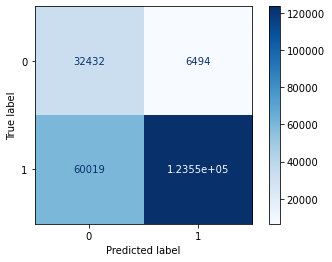

In [190]:
# logistic regression with new features and balanced & StandardScaler
def results(model):
    """This will return a classification report, a confusion matrix and runtime."""
    time_start = time.time()
    y_test_pred = model.predict(X_test)
    print('Train Accuracy:', model.score(X_train, y_train),
          '\nTest Accuracy:', model.score(X_test, y_test),
          '\nROC_AUC_Score:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
          '\nExecution time: {}'.format(time.time() - time_start))
    print(classification_report(y_test, y_test_pred))
    plot_confusion_matrix(model, X_test, y_test, values_format='.5g', cmap='Blues')
    plt.show()
    
#Cost-Sensitive Logistic Regression for imbalanced classes

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipe.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=44)
scores = cross_val_score(pipe, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

print('Mean F1 score: %.3f' %(scores.mean()))
results(pipe)

Model with reduced features has different outcome as the F1 score and some other metrics didn't perform better than before. 

## Undersampling to balance the sample

I have used the built-in method to correct the imbalanced data. Here I would like to use the NearMiss module to resample the data to make equal proportion.

In [191]:
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)

In [194]:
print('Resampled dataset shape %s' % Counter(y_res))
#155,898

Resampled dataset shape Counter({0: 155898, 1: 155898})


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=44)

Mean F1 score: 0.738
Train Accuracy 0.730844785836848 
Test Accuracy: 0.730516356638871 
ROC_AUC_Score: 0.7885273154778261 
Execution time: 0.09665870666503906
              precision    recall  f1-score   support

           0       0.74      0.70      0.72     31048
           1       0.72      0.76      0.74     31312

    accuracy                           0.73     62360
   macro avg       0.73      0.73      0.73     62360
weighted avg       0.73      0.73      0.73     62360



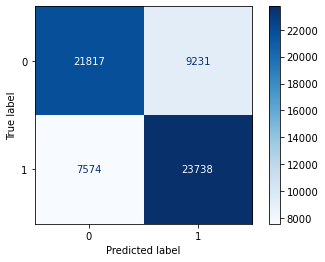

In [121]:
def results(model):
    """This will return a classification report, a confusion matrix and runtime."""
    time_start = time.time()
    y_test_pred = model.predict(X_test)
    print('Train Accuracy', model.score(X_train, y_train),
          '\nTest Accuracy:', model.score(X_test, y_test),
          '\nROC_AUC_Score:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
          '\nExecution time: {}'.format(time.time() - time_start))
    print(classification_report(y_test, y_test_pred))
    plot_confusion_matrix(model, X_test, y_test, values_format='.5g', cmap='Blues')
    plt.show()
    

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(max_iter=1000))
])
pipe.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=44)
scores = cross_val_score(pipe, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

print('Mean F1 score: %.3f' %(scores.mean()))
results(pipe)

Undersampling didn't perform better with logistic classification compared to built-in resampling method.

## Boosting model

In [130]:
#Gradient boosting classifier
gbr = GradientBoostingClassifier(learning_rate= 0.2, n_estimators= 400, random_state = 44,max_depth=4, max_features=3 )
gbr.fit(X_train, y_train)
pred = gbr.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
display(pd.DataFrame({'Variable':X_train.columns,
              'Importance':gbr.feature_importances_}).sort_values('Importance', ascending=False).head(10))
print('ROC_AUC:{:.3f}'.format(roc_auc_score(y_test, gbr.predict_proba(X_test)[:,1])))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     31048
           1       0.89      0.87      0.88     31312

    accuracy                           0.88     62360
   macro avg       0.88      0.88      0.88     62360
weighted avg       0.88      0.88      0.88     62360

[[27667  3381]
 [ 4220 27092]]


,Variable,Importance
0,Term,0.486096
6,GDP,0.190670
1,GrAppv,0.144845
3,SBA_Appv,0.075425
5,RetainedJob,0.062321
2,UrbanRural,0.026254
4,State_default,0.014390


ROC_AUC:0.947


## Model Tuning

In [132]:
# finding the best parameters
params ={"learning_rate"    : [0.05, 0.10, 0.15],
         "max_depth"        : [5,7],
         'min_samples_leaf' : [50, 100, 200],
         'max_features'     : [3,4],
         'n_estimators'     : [350, 450, 500],
         "random_state"     : [44]
      }

clf = GridSearchCV(GradientBoostingClassifier(loss='deviance'), params, cv=2)
clf.fit(X_train, y_train)
results = pd.DataFrame(clf.cv_results_)
results                 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,21.306164,0.285107,0.903928,0.013265,0.05,5,3,50,350,44,"{'learning_rate': 0.05, 'max_depth': 5, 'max_f...",0.871310,0.868736,0.870023,0.001287,105
1,28.064782,0.354261,1.142972,0.006986,0.05,5,3,50,450,44,"{'learning_rate': 0.05, 'max_depth': 5, 'max_f...",0.872985,0.871687,0.872336,0.000649,98
2,30.642577,0.240669,1.245131,0.002772,0.05,5,3,50,500,44,"{'learning_rate': 0.05, 'max_depth': 5, 'max_f...",0.874421,0.872456,0.873438,0.000982,92
3,21.381799,0.057887,0.912348,0.004806,0.05,5,3,100,350,44,"{'learning_rate': 0.05, 'max_depth': 5, 'max_f...",0.870588,0.867533,0.869061,0.001527,107
4,28.357688,0.417424,1.124403,0.005143,0.05,5,3,100,450,44,"{'learning_rate': 0.05, 'max_depth': 5, 'max_f...",0.873266,0.870356,0.871811,0.001455,100
5,31.094031,0.011362,1.236800,0.006194,0.05,5,3,100,500,44,"{'learning_rate': 0.05, 'max_depth': 5, 'max_f...",0.873891,0.871390,0.872641,0.001251,95
6,21.685378,0.037902,0.921186,0.003348,0.05,5,3,200,350,44,"{'learning_rate': 0.05, 'max_depth': 5, 'max_f...",0.869425,0.867629,0.868527,0.000898,108
7,27.753425,0.011806,1.138268,0.005113,0.05,5,3,200,450,44,"{'learning_rate': 0.05, 'max_depth': 5, 'max_f...",0.871999,0.869915,0.870957,0.001042,102
8,30.785555,0.096596,1.240268,0.000168,0.05,5,3,200,500,44,"{'learning_rate': 0.05, 'max_depth': 5, 'max_f...",0.873130,0.870620,0.871875,0.001255,99
9,26.508995,0.717888,0.919808,0.003482,0.05,5,4,50,350,44,"{'learning_rate': 0.05, 'max_depth': 5, 'max_f...",0.871823,0.869474,0.870648,0.001175,103


In [133]:
# best parameters to tune the model
clf.best_params_

{'learning_rate': 0.15,
 'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 50,
 'n_estimators': 500,
 'random_state': 44}

## Final model(Gradient Boost)

In [140]:
#Gradient boosting classifier after tuning 
gbc = GradientBoostingClassifier(learning_rate= 0.15,
                                 n_estimators= 500,
                                 max_depth= 7,
                                 max_features=4,
                                random_state = 44)
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
display(pd.DataFrame({'Variable':X_train.columns,
              'Importance':gbc.feature_importances_}).sort_values('Importance', ascending=False).head(10))
print('ROC_AUC:{:.3f}'.format(roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1])))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     31048
           1       0.89      0.87      0.88     31312

    accuracy                           0.88     62360
   macro avg       0.88      0.88      0.88     62360
weighted avg       0.88      0.88      0.88     62360

[[27756  3292]
 [ 3992 27320]]


,Variable,Importance
0,Term,0.446863
6,GDP,0.197793
1,GrAppv,0.143429
3,SBA_Appv,0.109529
5,RetainedJob,0.055716
2,UrbanRural,0.026195
4,State_default,0.020474


ROC_AUC:0.953


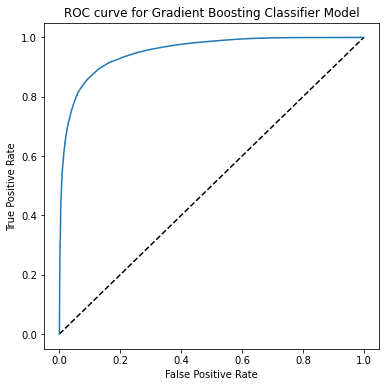

In [141]:
#plotting the GBC ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Gradient Boosting Classifier Model')
plt.show()

The ROC curve shows the trade-off between the true positive and false positive rate in the model. The bigger the total area under the ROC curve, the better the model performance. The above chart shows the ROC curve for the GBC model. 

## Further research
For further research, I would like to check with other methods eg MLP or cost-sensitive boosting algorithm like AdaBoost. I am also willing to develop a Flask app which will be easier for the company to get defaulters screening information quickly.

## Citation


--------------------------------------------------

https://www.sba.gov/about-sba/organization

https://www.forbes.com/sites/maneetahuja/2021/08/02/insights-on-the-five-stages-of-small-business-growth/?sh=1d43a08f630b

https://open.lib.umn.edu/exploringbusiness/chapter/5-2-the-importance-of-small-business-to-the-u-s-economy/

https://www.americanactionforum.org/research/tracker-paycheck-protection-program-loans/

https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied